In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

import pickle

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))
X = X/255.0


model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X,y,batch_size =32,epochs = 10, validation_split =0.1)


print("A")

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 50s 2ms/sample - loss: 0.6326 - acc: 0.6341 - val_loss: 0.5572 - val_acc: 0.7150
Epoch 2/10
22451/22451 [==============================] - 45s 2ms/sample - loss: 0.5449 - acc: 0.7283 - val_loss: 0.5394 - val_acc: 0.7335
Epoch 3/10
22451/22451 [==============================] - 42s 2ms/sample - loss: 0.5020 - acc: 0.7570 - val_loss: 0.5407 - val_acc: 0.7327
Epoch 4/10
22451/22451 [==============================] - 44s 2ms/sample - loss: 0.4748 - acc: 0.7754 - val_loss: 0.5019 - val_acc: 0.7607
Epoch 5/10
22451/22451 [==============================] - 46s 2ms/sample - loss: 0.4508 - acc: 0.7907 - val_loss: 0.4946 - val_acc: 0.7723
Epoch 6/10
22451/22451 [==============================] - 46s 2ms/sample - loss: 0.4312 - acc: 0.7982 - val_loss: 0.4722 - val_acc: 0.7788
Epoch 7/10
22451/22451 [==============================] - 40s 2ms/sample - loss: 0.4096 - acc: 0.8112 - val_loss: 0.4

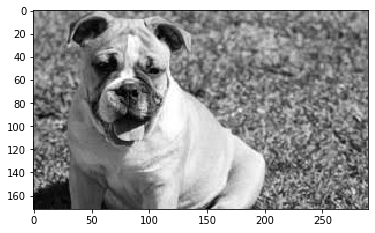

Dog


In [50]:
import cv2
import matplotlib.pyplot as plt
IMG_SIZE =50
CATEGORIES = ["Dog", "Cat"]

def prepare(filepath):
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)


pred = model.predict([prepare("/tf/dog.jpeg")])


print(CATEGORIES[int(pred[0][0])])
    